# Tutorial 1 - How to create a voting profile

In this Notebook, I will explain how to create a **profile of voters with embeddings**.

In [2]:
import embedded_voting as ev
import numpy as np
import matplotlib.pyplot as plt

## Build a profile

Let's first create **a simple profile** of voters with no embeddings, with $m=5$ candidates and $n=100$ voters:

In [3]:
n_candidates = 5
n_voters = 100
profile = ev.Profile(np.random.rand(n_voters,n_candidates))

Here we created a profile with random ratings between $0$ and $1$. We could have used the *impartial culture* model for this :

In [4]:
profile = ev.ImpartialCulture(n_voters, n_candidates)

We can also change the ratings afterwards, for instance by saying that the last 50 voters do not like the first 2 candidates :

In [5]:
profile.ratings[50:,:2] = 0.1

Now, we want to create embeddings for our voters. To do so, we create an **Embeddings** object:

In [6]:
embs = ev.Embeddings(np.array([[.9,0,.1],
              [.8,.1,0],
              [.1,.1,.9],
              [0,.2,.8],
              [0,1,0],
              [.2,.3,.2],
              [.5,.1,.9]]))

We can normalize the embeddings, so that each vector have norm $1$:

In [7]:
embs.normalize().positions

array([[0.99388373, 0.        , 0.11043153],
       [0.99227788, 0.12403473, 0.        ],
       [0.10976426, 0.10976426, 0.98787834],
       [0.        , 0.24253563, 0.9701425 ],
       [0.        , 1.        , 0.        ],
       [0.48507125, 0.72760688, 0.48507125],
       [0.48336824, 0.09667365, 0.87006284]])

You can also use an *Embedder* to generate embeddings from the ratings. The simplest one is the one generating the uniform distribution of embeddings : 

In [8]:
embedder = ev.RandomEmbedder(3)
_ = profile.generate_embeddings(embedder)

Let's now create more complex embeddings for our profile

In [9]:
positions = [[.8,.2,.2] + np.random.randn(3)*0.05 for _ in range(33)]
positions += [[.2,.8,.2] + np.random.randn(3)*0.05 for _ in range(33)]
positions += [[.2,.2,.8] + np.random.randn(3)*0.05 for _ in range(34)]
embs = ev.Embeddings(np.array(positions))

Then, you attach embeddings to your profile by doing the following:

In [10]:
profile.embeddings = embs

There are several way to create embeddings, some of them using the ratings of the voters, but we will see it in another notebook.

## Visualize the profile

Now that we have a profile, we want to visualize it. Since the number of embeddings dimensions is only 3 in our profile, we can easily plot it on a figure. 

There are two ways of plotting your profile, using a *3D* plot or a *ternary* plot :

   * On the <u>**3D plot**</u>, each voter is represented by a line from the origin to its position on the unit sphere.
   * On the <u>**ternary plot**</u>, the surface of the unit sphere is represented as a 2D space and each voter is represented by a dot.

On the following figures we can see the  **<font color=red>red group of voters</font>**, which corresponds to the $25$ voters with similar embeddings I added in *the fourth cell*.

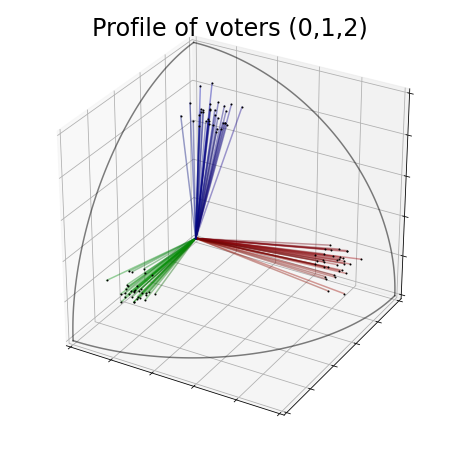

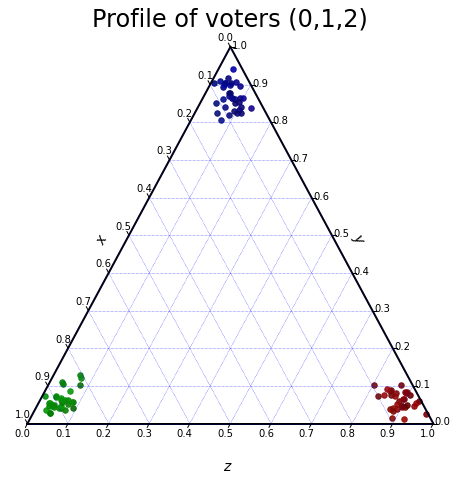

TernaryAxesSubplot: -9223371901534321611

In [11]:
embs.plot("3D")
embs.plot("ternary")

You can also plot the two figures **side by side** :

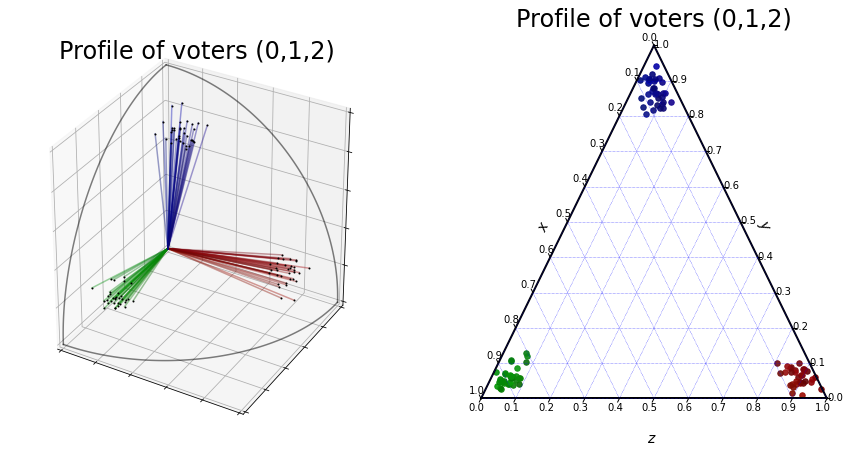

In [12]:
fig = plt.figure(figsize=(15,7.5))
embs.plot("3D", fig=fig, plot_position=[1,2,1], show=False)
embs.plot("ternary", fig=fig, plot_position=[1,2,2], show=False)
plt.show()

## Visualize the candidates

With the same idea, you can visualize the **candidates**.

   * On a <u>**3D plot**</u>, the score given by a voter to a candidate is represented by the **size of its vector**.
   * On a <u>**ternary plot**</u>, the score given by a voter to a candidate is represented by the **size of the dot**.

Use <tt>plot_candidate</tt> to plot only **one** candidate and <tt>plot_candidates</tt> to plot **all** the candidates. In the following plots, we can see that the  **<font color=blue>blue group</font>** don't like the first two candidates.

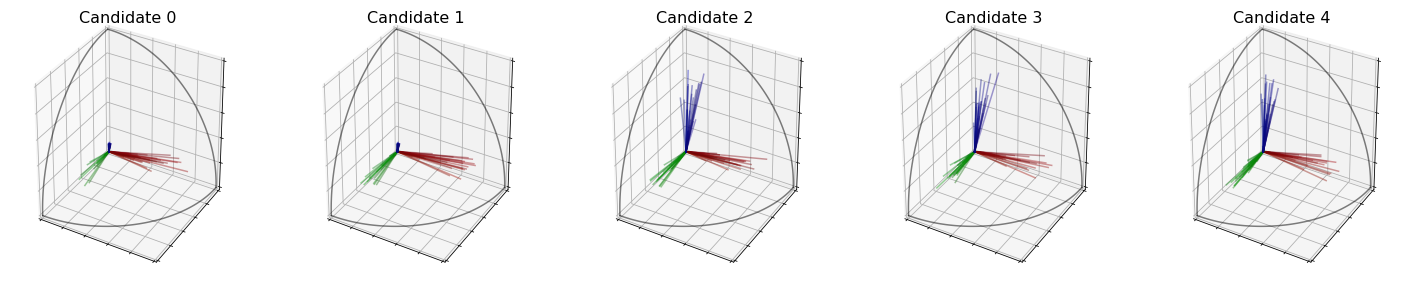

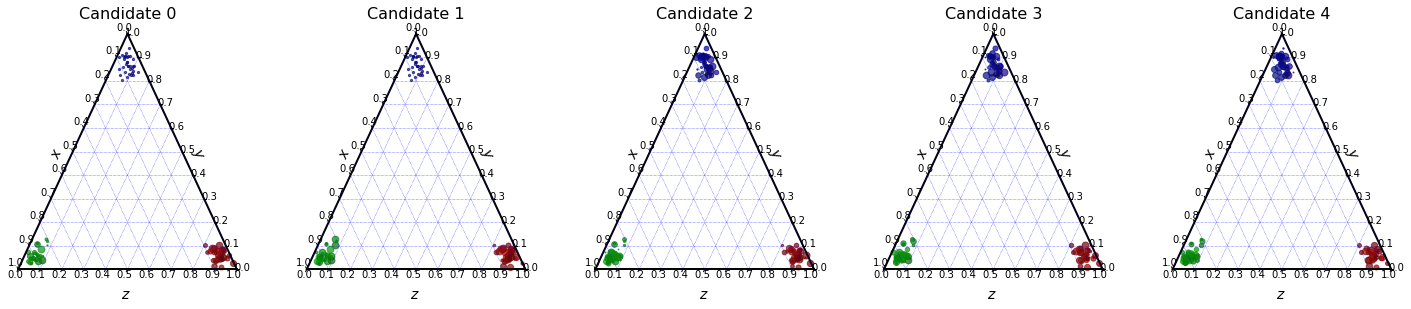

In [13]:
profile.plot_candidates("3D")
profile.plot_candidates("ternary")

## Beyond 3 dimensions

What if the profile has **more** than 3 dimensions? 

We still want to visualize the profile and the candidates. 

In the following cell, we create a profile with **4 dimensions**.

In [14]:
profile.generate_embeddings(ev.RandomEmbedder(4))

We use the functions described above and specify **which dimensions** to use on the plots (we need exactly $3$ dimensions). 

By default, the function uses the first three dimensions.

In the following cell, we show the distribution of voters with different subsets of the $4$ possible dimensions.

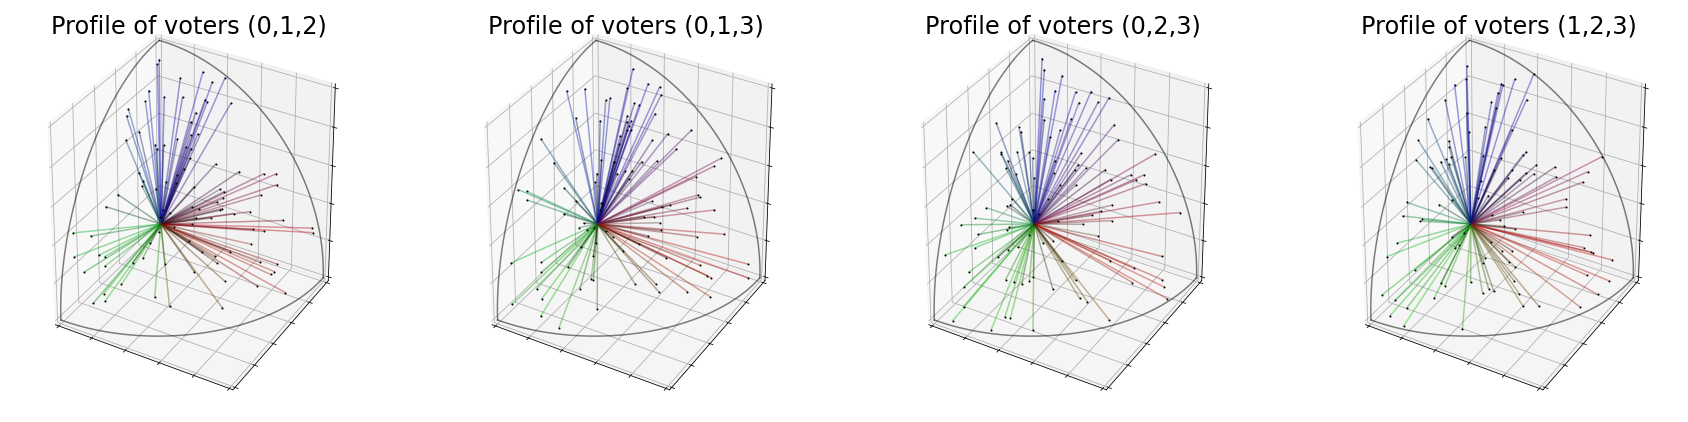

In [15]:
fig = plt.figure(figsize=(30,7.5))
profile.embeddings.plot("3D", dim=[0,1,2], fig=fig, plot_position=[1,4,1], show=False)
profile.embeddings.plot("3D", dim=[0,1,3], fig=fig, plot_position=[1,4,2], show=False)
profile.embeddings.plot("3D", dim=[0,2,3], fig=fig, plot_position=[1,4,3], show=False)
profile.embeddings.plot("3D", dim=[1,2,3], fig=fig, plot_position=[1,4,4], show=False)
plt.show()

## Recenter and dilate a profile

Sometimes the voters' embeddings are really close one to another and it is hard to do anything with the profile, because it looks like every voter is the same. 

For instance, we can create three groups of voters with **very similar embeddings** :

In [16]:
embeddings = ev.Embeddings(np.array([[.9,.3,.3],[.8,.4,.3],[.8,.3,.4]])).normalize()

If I plot this profile, the three voters are really close to each other:

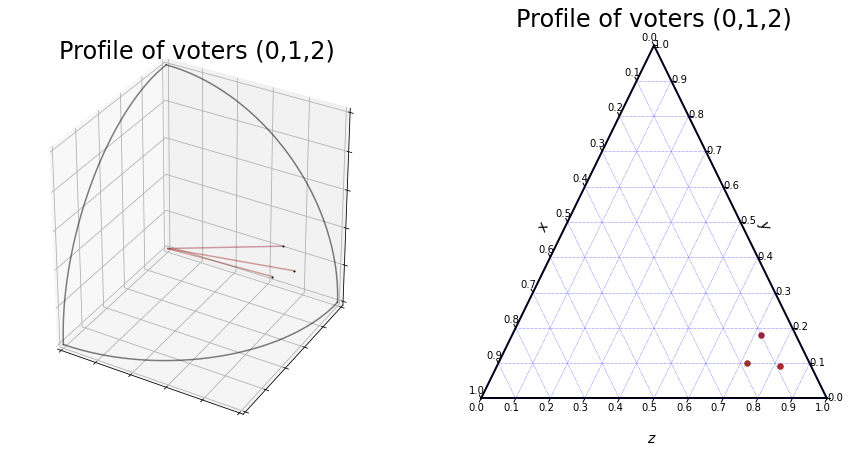

In [17]:
fig = plt.figure(figsize=(15,7.5))
embeddings.plot("3D", fig=fig, plot_position=[1,2,1], show=False)
embeddings.plot("ternary", fig=fig, plot_position=[1,2,2], show=False)
plt.show()

The first thing we can do is **to recenter** the population of voters:

In [18]:
embeddings_optimized = embeddings.copy()
embeddings_optimized.recenter()

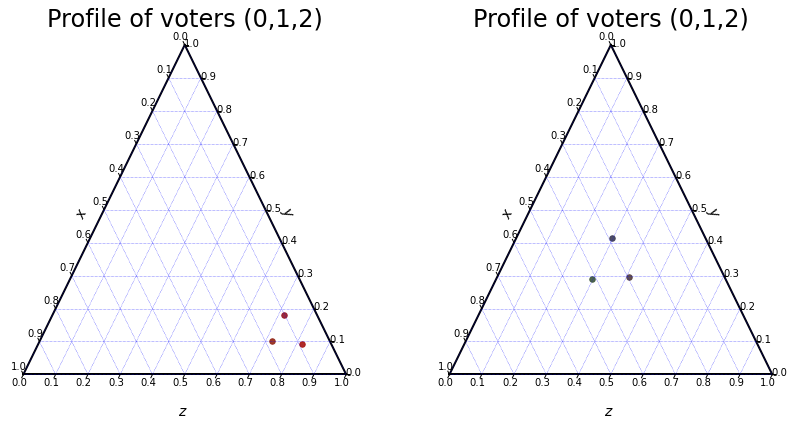

In [19]:
fig = plt.figure(figsize=(14,7))
embeddings.plot("ternary", fig=fig, plot_position=[1,2,1], show=False)
embeddings_optimized.plot("ternary", fig=fig, plot_position=[1,2,2], show=False)
plt.show()

Now, we can **dilate** the profile in such a way that the **relative distance** between each pair of voters remains the same, but they **take all the space they can** on the non-negative orthant. 

To do so, we use the funtion <tt>dilate</tt>. 

In [20]:
embeddings_optimized.dilate()

As you can see on the second plot, voters are **pushed to the extreme positions** of the non-negative orthant.

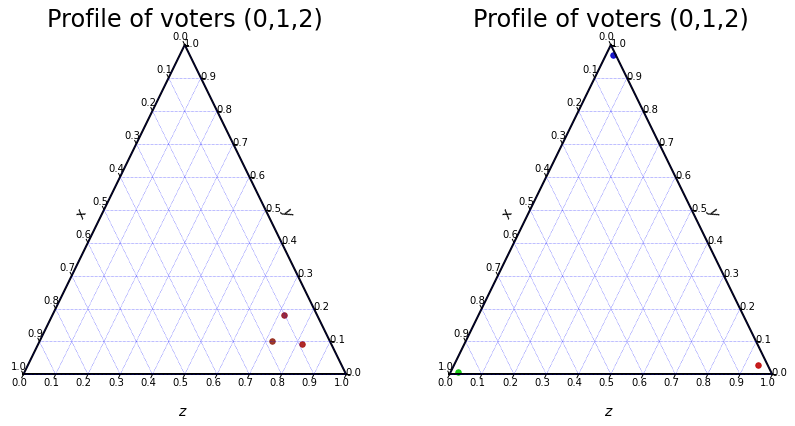

In [21]:
fig = plt.figure(figsize=(14,7))
embeddings.plot("ternary", fig=fig, plot_position=[1,2,1], show=False)
embeddings_optimized.plot("ternary", fig=fig, plot_position=[1,2,2], show=False)
plt.show()

## Introduction to parametric profile generator

Our package also proposes an easy way to build a profile with *"groups"* of voters **who have similar embeddings and preferences**.

To do so, we need to specify :

   * The number of **candidates**, **dimensions**, and **voters** in the profile.
   * The matrix $M$ of **the scores of each "group"**. $M(i,j)$ is the score given by the group $j$ to the candidate $i$.
   * The **proportion** of the voters in each group.
   
For instance, in the following cell, I am building a profile of $100$ voters in $3$ dimensions, with $5$ candidates. There are $3$ groups in this profile :

   * The  **<font color=red>red group</font>**, with $50\%$ of the voters. Voters from this group have preferences close to $c_0 > c_1 > c_2 > c_3 > c_4$.
   * The **<font color=green>green group</font>**, with $30\%$ of the voters. Voters from this group have preferences close to $c_1 \sim c_3 > c_0 \sim c_2 \sim c_4$.
   * The  **<font color=blue>blue group</font>**, with $20\%$ of the voters. Voters from this group have preferences close to $c_4 > c_3 > c_2 > c_1 > c_0$.

In [22]:
scores_matrix = [[1, .7, .5, .3, 0], [.2, .8, .2, .8, .2], [0, .3, .5, .7, 1]]
proba = [.5, .3, .2]
n_voters = 100
n_dimensions, n_candidates = np.array(scores_matrix).shape
profile_generator = ev.ProfileGenerator(n_voters, n_candidates, n_dimensions,  scores_matrix, proba)

Then, we need to specify the **level of <u>polarisation</u>** of the profile. 

A *high* level of polarisation ($> 0.5$) means that voters in the different groups are aligned with the dimension of each group. Therefore, there embeddings are really similar.

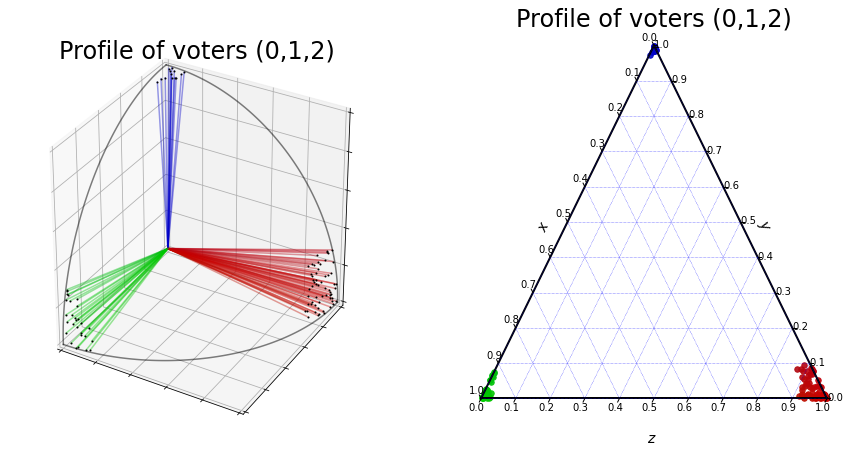

In [23]:
profile = profile_generator(polarisation=0.7)

fig = plt.figure(figsize=(15,7.5))
profile.embeddings.plot("3D", fig=fig, plot_position=[1,2,1], show=False)
profile.embeddings.plot("ternary", fig=fig, plot_position=[1,2,2], show=False)
plt.show()

On the opposite, if the level of polarisation is *low* ($< 0.5$), then voters' embeddings are more random.

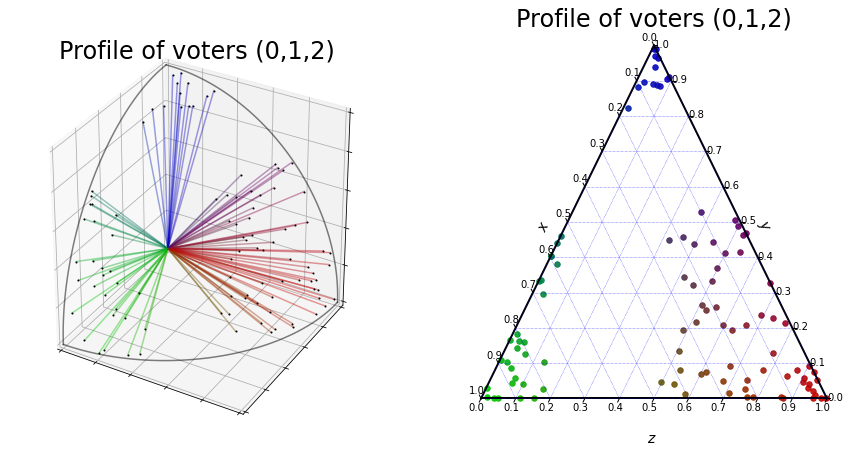

In [24]:
profile = profile_generator(polarisation=0.2)

fig = plt.figure(figsize=(15,7.5))
profile.embeddings.plot("3D", fig=fig, plot_position=[1,2,1], show=False)
profile.embeddings.plot("ternary", fig=fig, plot_position=[1,2,2], show=False)
plt.show()

The second important parameter is **<u>coherence</u>**. 

The coherence parameter characterizes the **correlation** between the embeddings of the voters and the score they give to the candidates. If this parameter is set to $1$, then the scores of a group **dictate** the scores of the voters in this group.

By default, it is set to $0$, which means that the scores are **totally random** and there is no correlation between the embeddings and the scores.

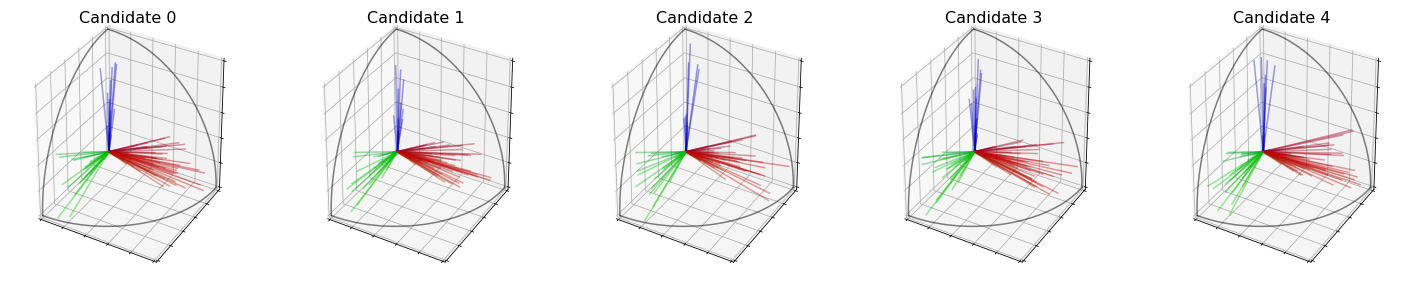

In [25]:
profile = profile_generator(polarisation=0.5)
profile.plot_candidates()

In the following cell, we can see that a *high* coherence implies that embeddings and scores are very correlated.

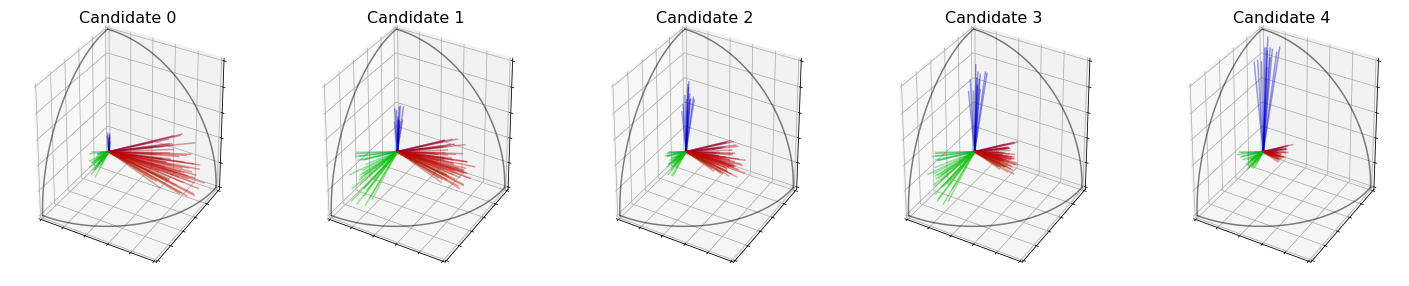

In [26]:
profile = profile_generator(polarisation=0.5, coherence=0.8)
profile.plot_candidates()

If you want to **easily create a parametric profile** with random scores for each group, you can do the following :

In [27]:
profile_bis = ev.ProfileGenerator(n_voters, n_candidates, n_dimensions)(.6,.8)